# INTRODUCCIÓN
De acuerdo al notebook 'model_tests.ipynb' donde se realizarón múltiples
pruebas en la ejecución de modelos, se determinó que el mejor modelo de
clasificación es el modelo de XGBoost siendo explicativas las variables
de ACCESO INTERNET, ACCESO GAS NATURAL y DISTANCIA A LA CAPITAL


# MODULOS

In [1]:
import pickle
from pycaret.classification import *
from pycaret.utils import check_metric

# CARGAR DATOS

In [2]:
#Open the.pickle file
with open('C:/Users/Braya/OneDrive/Documentos/DS4A/consolidado_datos.pickle', 'rb') as f:
    loaded_obj = pickle.load(f)

# SUBSET DE DATOS

In [3]:
y_binarizer = [1 if i >=  246 else 0 for i in loaded_obj['PUNT_GLOBAL_MEAN'] ] 
data_bi = loaded_obj.copy()
data_bi['PUNT_GLOBAL_MEAN'] = y_binarizer
dataset = data_bi[['INDICADOR_INTERNET', 'INDICADOR_GAS_NATURAL', 'KmDist', 'PUNT_GLOBAL_MEAN']] # Mean accuracy 0.81

# SUBSET ENTRENAMIENTO PRUEBA

In [4]:
data = dataset.sample(frac=0.8, random_state=1409)
data_unseen = dataset.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (186, 4)
Unseen Data For Predictions: (46, 4)


# CONFIGURAR MODELADO

In [5]:
exp_class1 = setup(data = data, target = 'PUNT_GLOBAL_MEAN', session_id=1409)

,Description,Value
0,session_id,1409
1,Target,PUNT_GLOBAL_MEAN
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(186, 4)"
5,Missing Values,True
6,Numeric Features,3
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


# COMPARAR MODELOS

In [6]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.7615,0.8048,0.7143,0.7949,0.7457,0.5268,0.5346,0.0430
rf,Random Forest Classifier,0.7538,0.8107,0.7310,0.7774,0.7413,0.5119,0.5239,0.0400
xgboost,Extreme Gradient Boosting,0.7538,0.8440,0.7452,0.7708,0.7461,0.5126,0.5232,0.0520
lightgbm,Light Gradient Boosting Machine,0.7385,0.8000,0.7095,0.7612,0.7256,0.4787,0.4856,0.0070
gbc,Gradient Boosting Classifier,0.7154,0.8286,0.7310,0.7156,0.7164,0.4348,0.4416,0.0110
lda,Linear Discriminant Analysis,0.7154,0.7548,0.5310,0.8600,0.6342,0.4359,0.4771,0.0030
dt,Decision Tree Classifier,0.6923,0.6964,0.6952,0.6947,0.6802,0.3902,0.4034,0.0030
qda,Quadratic Discriminant Analysis,0.6923,0.7476,0.4714,0.8767,0.5960,0.3910,0.4484,0.0040
ada,Ada Boost Classifier,0.6615,0.6619,0.6833,0.6730,0.6570,0.3282,0.3490,0.0130
nb,Naive Bayes,0.6462,0.7310,0.4429,0.7717,0.5411,0.3006,0.3362,0.0030


# CREAR MODELO

In [7]:
xgboost = create_model('xgboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6154,0.8095,0.6667,0.5714,0.6154,0.2353,0.2381
1,0.7692,0.8214,0.8333,0.7143,0.7692,0.5412,0.5476
2,0.8462,0.8810,0.8333,0.8333,0.8333,0.6905,0.6905
3,0.6923,0.7857,0.8333,0.6250,0.7143,0.3953,0.4148
4,0.8462,0.8571,0.8571,0.8571,0.8571,0.6905,0.6905
5,0.7692,0.7857,0.5714,1.0000,0.7273,0.5517,0.6172
6,0.9231,0.8810,0.8571,1.0000,0.9231,0.8471,0.8571
7,0.8462,0.9524,0.8571,0.8571,0.8571,0.6905,0.6905
8,0.7692,0.9524,0.8571,0.7500,0.8000,0.5301,0.5367


## Configuracion del modelo

In [8]:
print(xgboost)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=-1, num_parallel_tree=1, objective='binary:logistic',
              predictor='auto', random_state=1409, reg_alpha=0, ...)


# MEDIDAS DE PRECISIÓN

## Área bajo la curva

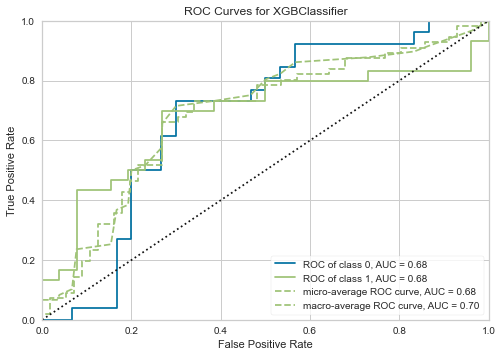

In [9]:
plot_model(xgboost)

## Importancia de predictores

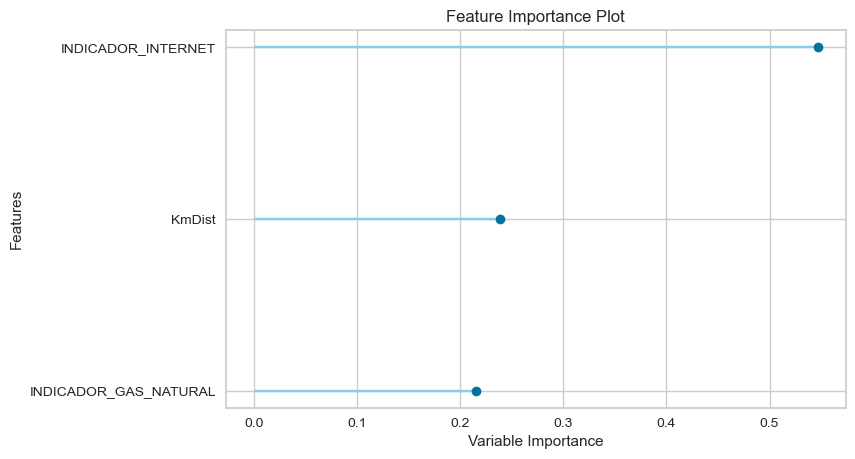

In [10]:
plot_model(xgboost, plot = 'feature')

# PREDICCION SOBRE CONJUNTO DE PRUEBA

In [11]:
final_xgboost = finalize_model(xgboost)

In [12]:
print(final_xgboost)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=-1, num_parallel_tree=1, objective='binary:logistic',
              predictor='auto', random_state=1409, reg_alpha=0, ...)


In [13]:
unseen_predictions = predict_model(final_xgboost, data=data_unseen)
unseen_predictions.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extreme Gradient Boosting,0.6739,0.7330,0.7917,0.6552,0.7170,0.3403,0.3489


,INDICADOR_INTERNET,INDICADOR_GAS_NATURAL,KmDist,PUNT_GLOBAL_MEAN,Label,Score
0,0.0164,0.068608,41.682092,0,1,0.9860
1,0.0203,0.067349,8.818185,0,0,0.7474
2,0.0114,0.051046,28.212119,1,0,0.9474
3,0.0519,0.097712,16.030613,1,1,0.9694
4,0.0193,0.084841,57.498683,1,1,0.5974


 Se obtiene una precisión de `67.39 %` en la clasificación dentro del conjunto de prueba.

In [14]:
save_model(final_xgboost,'modelo_clasificacion_xgboost')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[],
                                       target='PUNT_GLOBAL_MEAN',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 num...
                                gamma=0, gpu_id=-1, grow_policy='depthwise',
                                importance_type=None, interaction_constraints='',
                                learning_rate=0.300000012, max_bin=256,
    

In [15]:
saved_final_xgboost = load_model('modelo_clasificacion_xgboost')

Transformation Pipeline and Model Successfully Loaded


In [16]:
unseen_predictions = predict_model(saved_final_xgboost, data=data_unseen)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extreme Gradient Boosting,0.6739,0.7330,0.7917,0.6552,0.7170,0.3403,0.3489
